<h1 style='color: green; font-size: 26px; font-weight: bold;'> 1. Explorando as ofertas Relâmpagos, quais insights podem ser gerados? <h1>

En conjunto con el desafío te compartimos un archivo llamado ofertas_relampago.csv el
cual posee información de los resultados de ofertas del tipo relampago para un periodo de
tiempo y un país determinado.

Es decir, son ofertas que tienen una duración definida de algunas horas y un porcentaje de unidades (stock) comprometidas.
El objetivo de este desafío es hacer un EDA sobre estos datos buscando insights sobre este tipo de ofertas.

Las columnas del dataset son autoexplicativas pero puedes preguntarnos cualquier duda.

<strong>Entregable</strong>
El entregable de este desafío es una Jupyter notebook con el EDA

In [65]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [66]:
dir_data = "F:\PycharmProjects\DesaioMELI\data"
df_ofertas = pd.read_csv(dir_data+'\ofertas_relampago.csv')
df_ofertas.sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
1141,2021-07-08,2021-07-08 07:00:00+00:00,2021-07-08 13:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-MAKEUP_BRUSHES
30787,2021-07-11,2021-07-11 19:00:00+00:00,2021-07-12 01:00:01+00:00,lightning_deal,15,13,4.77,2.0,NaN,none,COMPUTERS,CE,MLM-MOUSE_PADS
48726,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 07:00:00+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,CLEANING,CPG,MLM-MULTIPURPOSE_CLEANERS_AND_DISINFECTANTS
14207,2021-07-09,2021-07-09 13:00:00+00:00,2021-07-09 18:53:16+00:00,lightning_deal,5,0,37.83,4.0,NaN,free_shipping,AUTOPARTS,ACC,MLM-AUTOMOTIVE_LED_LIGHT_BARS
40057,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-01 19:00:09+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,STATIONARY,HOME & INDUSTRY,MLM-SCHOOL_MODELING_CLAYS


In [67]:
#verificação de valores nulos
print("Tamando do dataset: ", df_ofertas.shape)
df_ofertas.isnull().sum().sort_values(ascending=False)

Tamando do dataset:  (48746, 13)


ORIGIN                       37430
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

In [68]:
df_ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

### Perguntas iniciais:
1. Dados: Os dados faltantes, podem ser subistituidos? Existe outlier(qtd de produtos, dia, horário, etc)?
2. Produtos: Quais foram os produtos que mais venderam?
3. Vendas durante a oferta: Existe dia e horário de pico e vale para as ofertas e para as quantidades vendidas?
4. Vendas durante a oferta:Existe correlação entre quantidade vendida vs Horário e dia da oferta?
5. Existe sazonalidade e tendência?
5. A duração da oferta influência na quantidade vendida?
6. Envio:O tipo de pagamento do envio tem impacto na quantidade vendida?
7. É possivél fazer o descarte ou junção de alguma variavél?
8. Como melhorar?



# 1. Data Cleanessing

### Ajustando o data type

In [69]:
#Datas iniciais e finais das ofertas
print('OFFER_START_DATE Data min: ', df_ofertas['OFFER_START_DATE'].min())
print('OFFER_START_DATE Data max: ', df_ofertas['OFFER_START_DATE'].max())
print('OFFER_START_DTTM Data min: ', df_ofertas['OFFER_START_DTTM'].min())
print('OFFER_START_DTTM Data max: ', df_ofertas['OFFER_START_DTTM'].max())
print('OFFER_FINISH_DTTM Data min: ', df_ofertas['OFFER_FINISH_DTTM'].min())
print('OFFER_FINISH_DTTM Data max: ', df_ofertas['OFFER_FINISH_DTTM'].max())

OFFER_START_DATE Data min:  2021-06-01
OFFER_START_DATE Data max:  2021-07-31
OFFER_START_DTTM Data min:  2021-06-01 07:00:00+00:00
OFFER_START_DTTM Data max:  2021-07-31 19:00:00+00:00
OFFER_FINISH_DTTM Data min:  2021-06-01 07:00:00+00:00
OFFER_FINISH_DTTM Data max:  2021-08-01 03:00:00+00:00


In [70]:
#estatística descritiva inicial sobre as datas
df_ofertas[['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM']].describe()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM
count,48746,48746,48746
unique,61,783,7578
top,2021-07-30,2021-07-30 13:00:00+00:00,2021-07-06 13:00:01+00:00
freq,1300,414,77


Na análise descritiva acima já é possivél identificar o dia com mais ofertas, mas ainda não é visto se é o dia de maior venda

In [71]:
#tipo de dados 'data'
df_ofertas['OFFER_START_DATE'] = pd.to_datetime(df_ofertas['OFFER_START_DATE'], format="%Y-%M-%d", errors='coerce').dt.date
df_ofertas['OFFER_START_DTTM'] = pd.to_datetime(df_ofertas['OFFER_START_DTTM'], errors='coerce')
df_ofertas['OFFER_FINISH_DTTM'] = pd.to_datetime(df_ofertas['OFFER_FINISH_DTTM'], errors='coerce')

# criando novas features para auxiliar nos insights.
df_ofertas['OFFER_DURATION'] = df_ofertas['OFFER_FINISH_DTTM'] - df_ofertas['OFFER_START_DTTM']
df_ofertas['OFFER_DURATION_SECONDS'] =  (df_ofertas['OFFER_FINISH_DTTM'] - df_ofertas['OFFER_START_DTTM']).dt.total_seconds().astype(int)
df_ofertas['OFFER_DAY'] = pd.to_datetime(df_ofertas['OFFER_START_DATE']).dt.day
df_ofertas['OFFER_START_HOUR'] = pd.to_datetime(df_ofertas['OFFER_START_DTTM']).dt.hour
df_ofertas['OFFER_FINISH_HOUR'] = pd.to_datetime(df_ofertas['OFFER_FINISH_DTTM']).dt.hour


# df_ofertas['OFFER_MONTH'] = pd.to_datetime(df_ofertas['OFFER_START_DATE']).dt.month
# df_ofertas['OFFER_YEAR'] = pd.to_datetime(df_ofertas['OFFER_START_DATE']).dt.year

In [72]:
#verificação tipo de dado
df_ofertas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   OFFER_START_DATE           48746 non-null  object             
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns, UTC]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns, UTC]
 3   OFFER_TYPE                 48746 non-null  object             
 4   INVOLVED_STOCK             48746 non-null  int64              
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64              
 6   SOLD_AMOUNT                24579 non-null  float64            
 7   SOLD_QUANTITY              24579 non-null  float64            
 8   ORIGIN                     11316 non-null  object             
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object             
 10  DOM_DOMAIN_AGG1            48746 non-null  object             
 11  VE

### Missing data

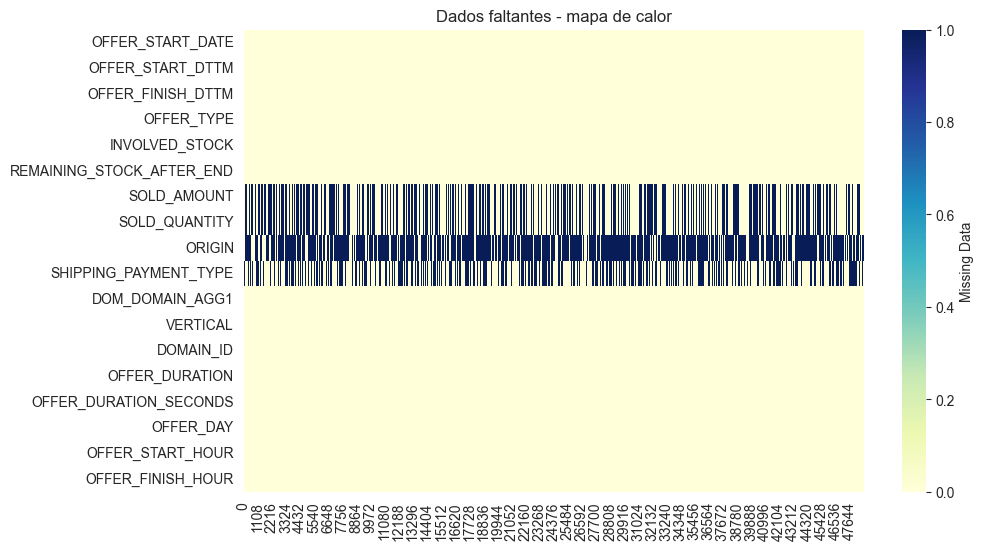

<Figure size 1000x600 with 0 Axes>

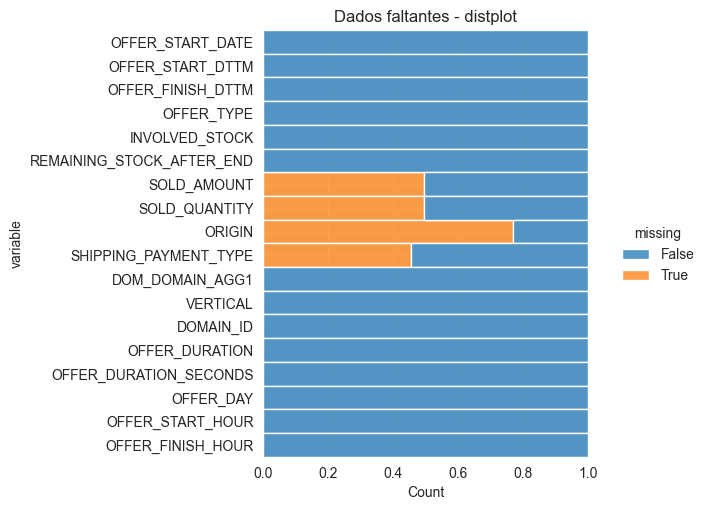

In [73]:
def plot_missing_values():
    #mapa de calor
    ax1 = plt.figure(figsize=(10,6))
    sns.heatmap((df_ofertas.isna() + df_ofertas.isin(['none'])).transpose(),
                cmap="YlGnBu",
                cbar_kws={'label': 'Missing Data'})
    plt.title("Dados faltantes - mapa de calor")
    plt.savefig("missing_value_heatmap.png", dpi=100)

    #distribuição
    ax2 = plt.figure(figsize=(10,6))
    sns.displot(
        data=(df_ofertas.isna() + df_ofertas.isin(['none'])).melt(value_name="missing"),
        y="variable",
        hue="missing",
        multiple="fill",
        aspect=1.25
    )
    plt.title("Dados faltantes - distplot")
    plt.savefig("/missing_values_distplot.png", dpi=100)

plot_missing_values()


In [74]:
df_ofertas['SHIPPING_PAYMENT_TYPE'].describe()

count             48746
unique                2
top       free_shipping
freq              26658
Name: SHIPPING_PAYMENT_TYPE, dtype: object

Observa-se que está faltando cerca de 76% dos dados de "ORIGIN" e o único valor não nulo é "A".
Existe a possibilidade de descarte dessa feature ou tratar como "outros" os valores nulos.
Para o pagamento do envio, 'none' será tratado como 'outro', sendo diferente de frete grátis.
Existe a possibilidade de substituição para registros com valores faltantes no caso de "SOLD_QUANTITY" e "SOLD_AMOUNT", mas não todos.

'SOLD_AMOUNT' e 'SOLD_QUANTITY' Aparentam ser variáveis correlacionadas, o percentual de dados faltantes é o mesmo, e com a vizualização do mapa de calor, percebe-se que quando o valor é nulo, sempre é no mesmo instante, ou seja, o valor de um caracteristica determina o valor da outra.
A ocorrência dos nulos para elas acontece quando não há variação no estoque ao final da promoção e quando as vendas ultrapassam o estoque portanto NaN, na verdade significa zero quantidade vendidas e zero receita ou quantidade mais vendida e receita total, de acordo com essa quantidade..

In [75]:
#Observa-se que alguns valores de quantidade e volume estão faltando para estoque negativo
df_ofertas[df_ofertas['REMAINING_STOCK_AFTER_END'] < 0]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_SECONDS,OFFER_DAY,OFFER_START_HOUR,OFFER_FINISH_HOUR
0,2021-01-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,0 days 07:02:43,25363,22,16,23
7,2021-01-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 04:05:39,14739,22,19,23
8,2021-01-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 04:05:32,14732,22,19,23
29,2021-01-22,2021-06-22 13:00:00+00:00,2021-06-22 14:20:21+00:00,lightning_deal,5,-4,12.18,9.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS,0 days 01:20:21,4821,22,13,14
77,2021-01-22,2021-06-22 16:00:00+00:00,2021-06-22 18:42:19+00:00,lightning_deal,8,-1,12.61,9.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,0 days 02:42:19,9739,22,16,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48629,2021-01-19,2021-06-19 14:00:00+00:00,2021-06-19 20:31:47+00:00,lightning_deal,10,-2,110.18,12.0,A,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-INFRARED_THERMOMETERS,0 days 06:31:47,23507,19,14,20
48669,2021-01-19,2021-06-19 19:00:00+00:00,2021-06-20 00:54:55+00:00,lightning_deal,15,-1,29.50,16.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-LED_STRIPS,0 days 05:54:55,21295,19,19,0
48681,2021-01-19,2021-06-19 07:00:00+00:00,2021-06-19 12:27:40+00:00,lightning_deal,5,-1,6.38,6.0,NaN,none,APPAREL,APP & SPORTS,MLM-SOCKS,0 days 05:27:40,19660,19,7,12
48711,2021-01-19,2021-06-19 19:00:00+00:00,2021-06-20 00:36:10+00:00,lightning_deal,5,-1,8.77,6.0,NaN,none,AUTOPARTS,ACC,MLM-VEHICLE_ACCESSORIES,0 days 05:36:10,20170,19,19,0


In [76]:
#Não tem o cenário onde o volume foi registrado quando a qtd vendida não foi computada.
df_ofertas[df_ofertas['SOLD_QUANTITY'].isna() & df_ofertas['SOLD_AMOUNT'].notnull()]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_SECONDS,OFFER_DAY,OFFER_START_HOUR,OFFER_FINISH_HOUR


In [77]:
#SHIPPING_PAYMENT_TYPE
df_ofertas.groupby('SHIPPING_PAYMENT_TYPE')['SHIPPING_PAYMENT_TYPE'].count()

SHIPPING_PAYMENT_TYPE
free_shipping    26658
none             22088
Name: SHIPPING_PAYMENT_TYPE, dtype: int64

In [78]:
def replace_missing_values():
    """ Itera por cada registro para comparar valores a atribuir os valores para os dados faltantes """
    for index, row in df_ofertas.iterrows():
        #se estoque é negativo
        if row['REMAINING_STOCK_AFTER_END'] < 0 and pd.isnull(row['SOLD_QUANTITY']):
            df_ofertas.at[index, 'SOLD_QUANTITY'] = row['INVOLVED_STOCK'] + abs(row['REMAINING_STOCK_AFTER_END'])

        elif row['REMAINING_STOCK_AFTER_END'] > 0 and row['INVOLVED_STOCK'] != row['REMAINING_STOCK_AFTER_END'] and pd.isnull(row['SOLD_QUANTITY']) and pd.isnull(row['SOLD_AMOUNT']):
            #se por algum motivo a quantidade vendida não foi computada, quando tem estoque restante após a venda
            df_ofertas.at[index, 'SOLD_QUANTITY'] = row['INVOLVED_STOCK'] - row['REMAINING_STOCK_AFTER_END']
            # temp_amount_value = [df_ofertas.at[index, 'SOLD_AMOUNT'] / df_ofertas.at[index, 'SOLD_QUANTITY'] if df_ofertas.at[index, 'SOLD_QUANTITY'] != 0 else 0]
            # df_ofertas.at[index, 'SOLD_AMOUNT'] = temp_amount_value

        elif row['INVOLVED_STOCK'] == row['REMAINING_STOCK_AFTER_END']:
            df_ofertas.at[index, 'SOLD_QUANTITY'] = row['INVOLVED_STOCK'] - row['REMAINING_STOCK_AFTER_END']
            df_ofertas.at[index, 'SOLD_AMOUNT'] = 0

        #Origem "OUTRAS" quando NaN
        if pd.isnull(row['ORIGIN']):
            df_ofertas.at[index, 'ORIGIN'] = 'OTHER'

        #meio de envio "OUTROS" quando 'none'
        if  row['SHIPPING_PAYMENT_TYPE'] == 'none':
            df_ofertas.at[index, 'SHIPPING_PAYMENT_TYPE'] = 'OTHER'

        #compra e não compra
        if row['INVOLVED_STOCK'] != row['REMAINING_STOCK_AFTER_END']:
            df_ofertas.at[index, 'CONVERTED'] = 'TRUE'
        else: df_ofertas.at[index, 'CONVERTED'] = 'FALSE'

    return df_ofertas
replace_missing_values().head(10)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_SECONDS,OFFER_DAY,OFFER_START_HOUR,OFFER_FINISH_HOUR,CONVERTED
0,2021-01-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,OTHER,PETS FOOD,CPG,MLM-BIRD_FOODS,0 days 07:02:43,25363,22,16,23,TRUE
1,2021-01-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,0.00,0.0,OTHER,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,0 days 06:00:02,21602,22,13,19,FALSE
2,2021-01-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,OTHER,OTHER,COMPUTERS,CE,MLM-SPEAKERS,0 days 06:00:01,21601,22,7,13,TRUE
3,2021-01-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,OTHER,OTHER,COMPUTERS,CE,MLM-HEADPHONES,0 days 06:36:12,23772,22,19,1,TRUE
4,2021-01-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,OTHER,OTHER,COMPUTERS,CE,MLM-HEADPHONES,0 days 02:48:12,10092,22,13,15,TRUE
5,2021-01-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,0.00,0.0,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 07:00:12,25212,22,18,1,FALSE
6,2021-01-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,0.00,0.0,OTHER,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 06:00:00,21600,22,13,19,FALSE
7,2021-01-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,OTHER,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 04:05:39,14739,22,19,23,TRUE
8,2021-01-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,11.0,OTHER,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,0 days 04:05:32,14732,22,19,23,TRUE
9,2021-01-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,OTHER,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS,0 days 06:00:00,21600,22,13,19,TRUE


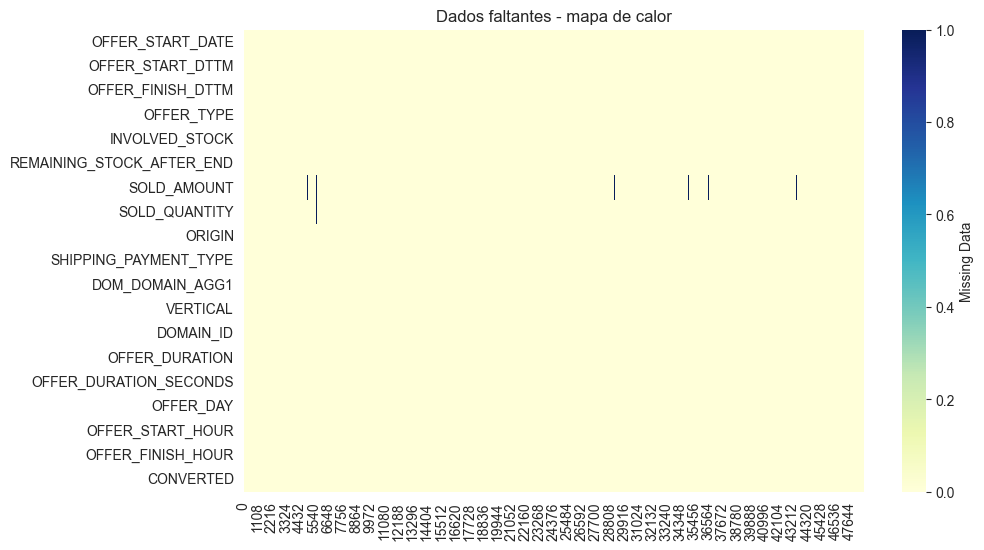

<Figure size 1000x600 with 0 Axes>

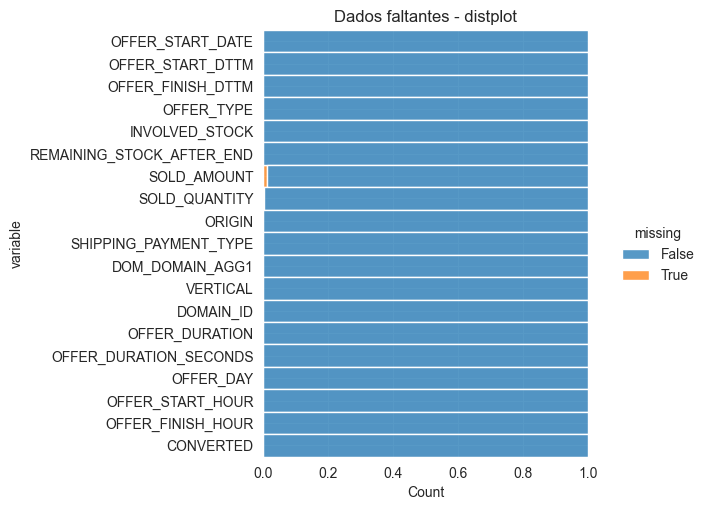

In [79]:
#Verificando valores nulos restante
plot_missing_values()

In [80]:
df_ofertas.isnull().mean().sort_values(ascending=False)

SOLD_AMOUNT                  0.012063
SOLD_QUANTITY                0.002441
OFFER_START_DATE             0.000000
VERTICAL                     0.000000
OFFER_FINISH_HOUR            0.000000
OFFER_START_HOUR             0.000000
OFFER_DAY                    0.000000
OFFER_DURATION_SECONDS       0.000000
OFFER_DURATION               0.000000
DOMAIN_ID                    0.000000
SHIPPING_PAYMENT_TYPE        0.000000
DOM_DOMAIN_AGG1              0.000000
OFFER_START_DTTM             0.000000
ORIGIN                       0.000000
REMAINING_STOCK_AFTER_END    0.000000
INVOLVED_STOCK               0.000000
OFFER_TYPE                   0.000000
OFFER_FINISH_DTTM            0.000000
CONVERTED                    0.000000
dtype: float64

In [81]:
#Drop dos valores nulos restante
df_ofertas = df_ofertas.dropna()
df_ofertas.isnull().mean().sort_values(ascending=False)

OFFER_START_DATE             0.0
DOM_DOMAIN_AGG1              0.0
OFFER_FINISH_HOUR            0.0
OFFER_START_HOUR             0.0
OFFER_DAY                    0.0
OFFER_DURATION_SECONDS       0.0
OFFER_DURATION               0.0
DOMAIN_ID                    0.0
VERTICAL                     0.0
SHIPPING_PAYMENT_TYPE        0.0
OFFER_START_DTTM             0.0
ORIGIN                       0.0
SOLD_QUANTITY                0.0
SOLD_AMOUNT                  0.0
REMAINING_STOCK_AFTER_END    0.0
INVOLVED_STOCK               0.0
OFFER_TYPE                   0.0
OFFER_FINISH_DTTM            0.0
CONVERTED                    0.0
dtype: float64

# EDA

## Vendas - exploração dos dados para análise de vendas efetivas

In [82]:
def bar_dist_sold_stock(col):
    #Distribuição das vendas agrupado por horário
    df_grouped_sold =  df_ofertas.groupby([col])['SOLD_QUANTITY'].sum().sort_values(ascending=False).reset_index()
    df_grouped_sold = df_grouped_sold.head(10).reset_index()

    #Distribuição das ofertas agrupado por horário
    df_grouped_offer =  df_ofertas.groupby([col])['INVOLVED_STOCK'].sum().sort_values(ascending=False).reset_index()
    df_grouped_offer = df_grouped_offer.head(10).reset_index()


    # Calcula o percentual de cada valor em relação ao total de vendas
    total_sold = df_grouped_sold['SOLD_QUANTITY'].sum()
    percent_sold = (df_grouped_sold['SOLD_QUANTITY'].value_counts(normalize=True) * total_sold).round(0)
    df_grouped_sold['PERCENT_SOLD'] = df_grouped_sold['SOLD_QUANTITY'].apply(lambda x: percent_sold[x])


    fig, ax1 = plt.subplots(figsize=(10, 6))
    sns.barplot(x=col, y='INVOLVED_STOCK', data=df_grouped_offer,color='red', ax=ax1,errorbar=None)

    # Adicionando o eixo secundário e plotando
    ax2 = ax1.twinx()
    sns.barplot(x=col, y='SOLD_QUANTITY',data=df_grouped_sold, color='green', ax=ax2, errorbar=None)

    # Config dos eixos
    ax1.set_xlabel(col)
    ax1.set_ylabel('SOLD_QUANTITY', color='blue')
    ax2.set_ylabel('INVOLVED_STOCK', color='red')

    ax1.set_title('TOP 10 - Distribuição de vendas por ' + col + ' - Oferta X Venda ')
    plt.savefig(col + "vendas_inicio.png", dpi=100)



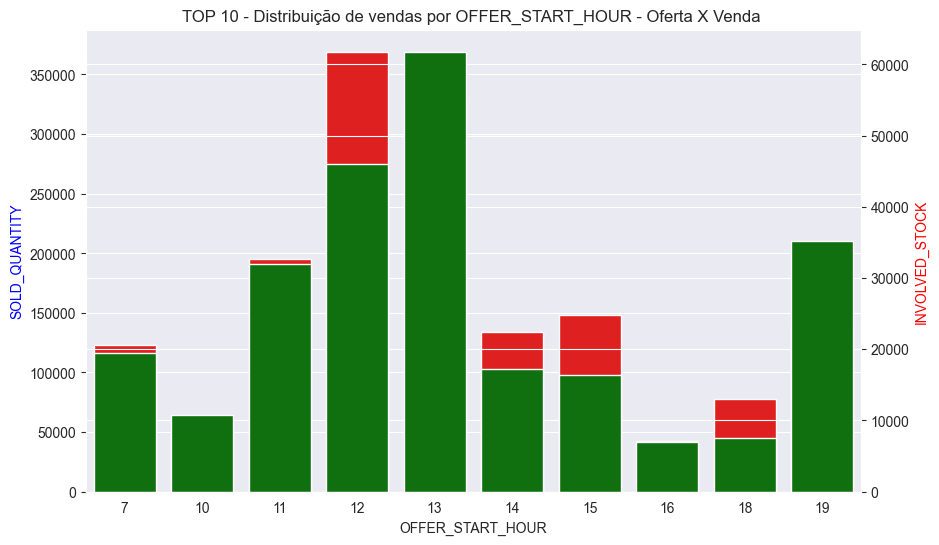

In [83]:
bar_dist_sold_stock('OFFER_START_HOUR')

Os horários de maior fluxo é justamente no período de almoço, 12:00 e 13:00 e a noite.
Uma obs: Não está considerando o tempo de duração de oferta, somente as iniciadas nesses horário e utilizadas no mesmo período.
Alterando o rankeamento para os 10 últimos horários, vemos que ofertas do inicio da madrugada e da manhã não têm tanta aderência.

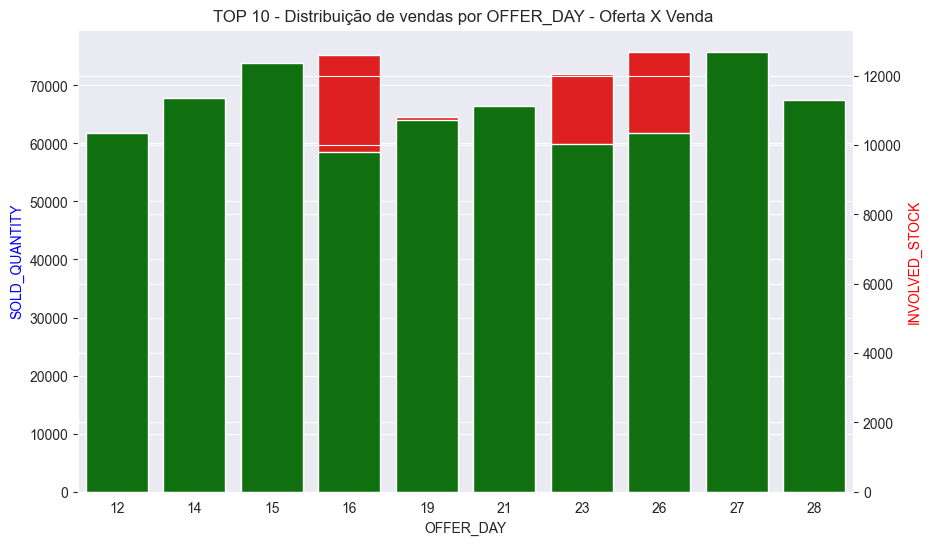

In [84]:
bar_dist_sold_stock('OFFER_DAY')

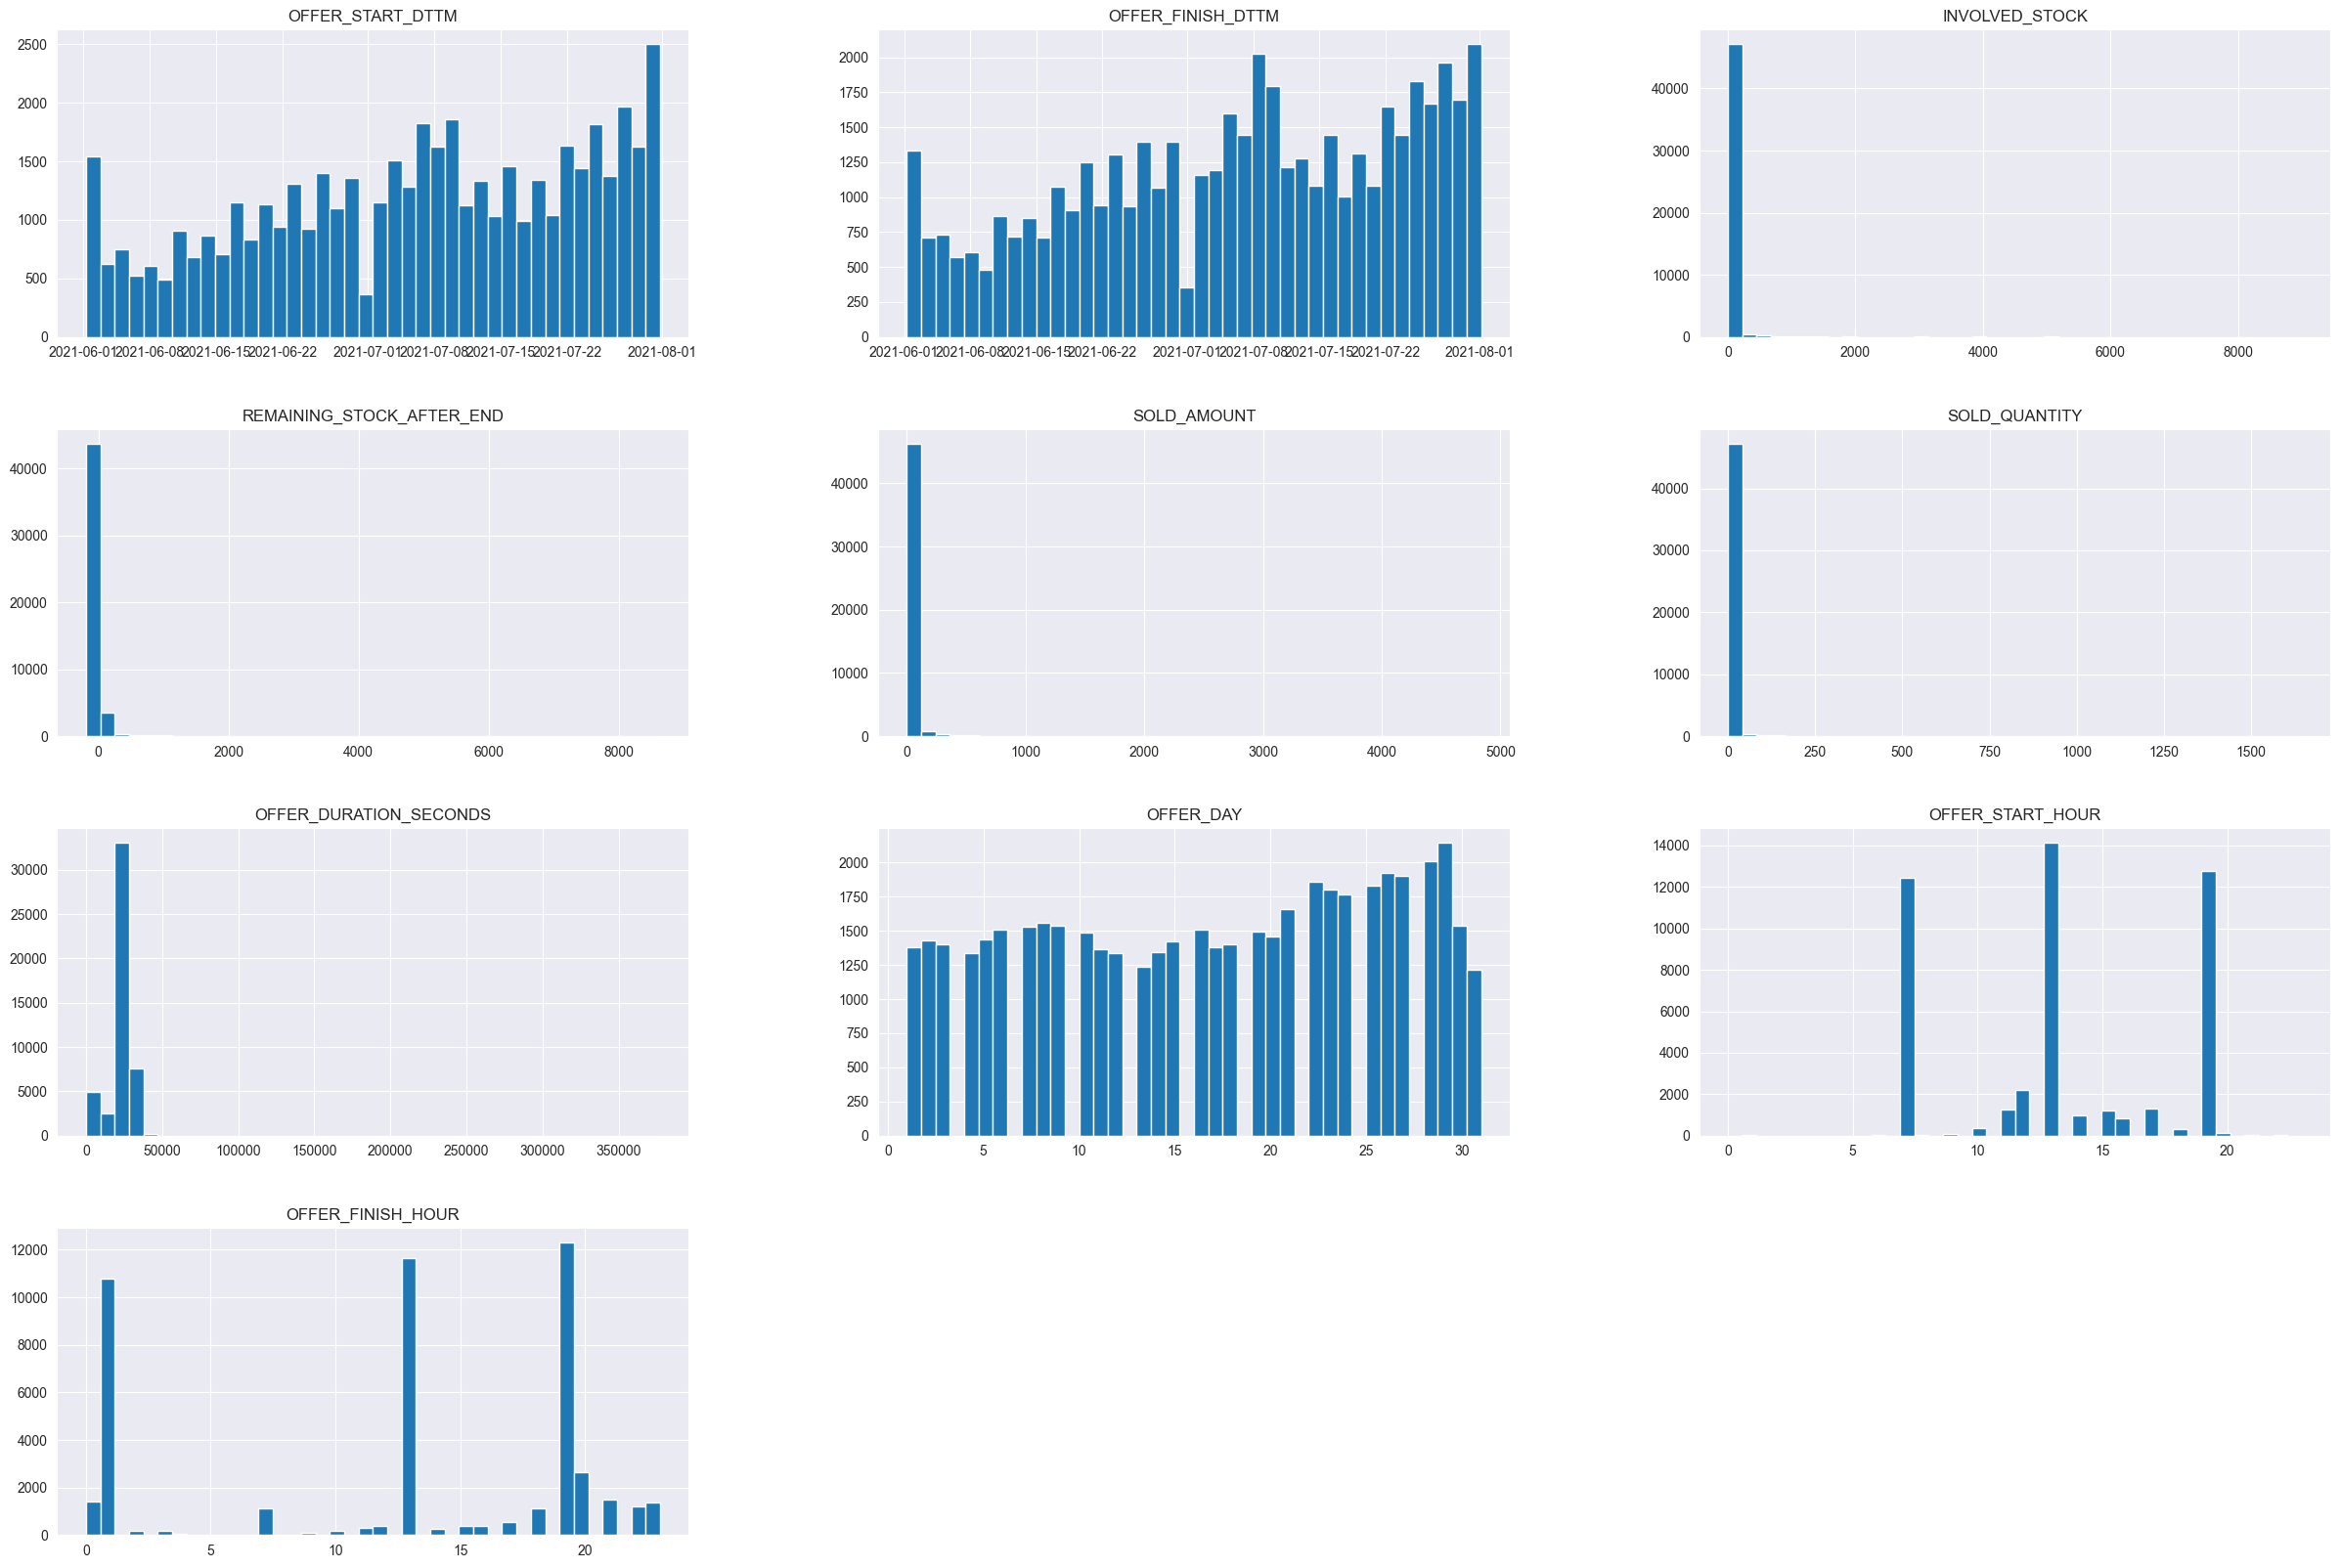

In [85]:
ax = df_ofertas.hist(bins=40, figsize=(30,20))
ax = ax

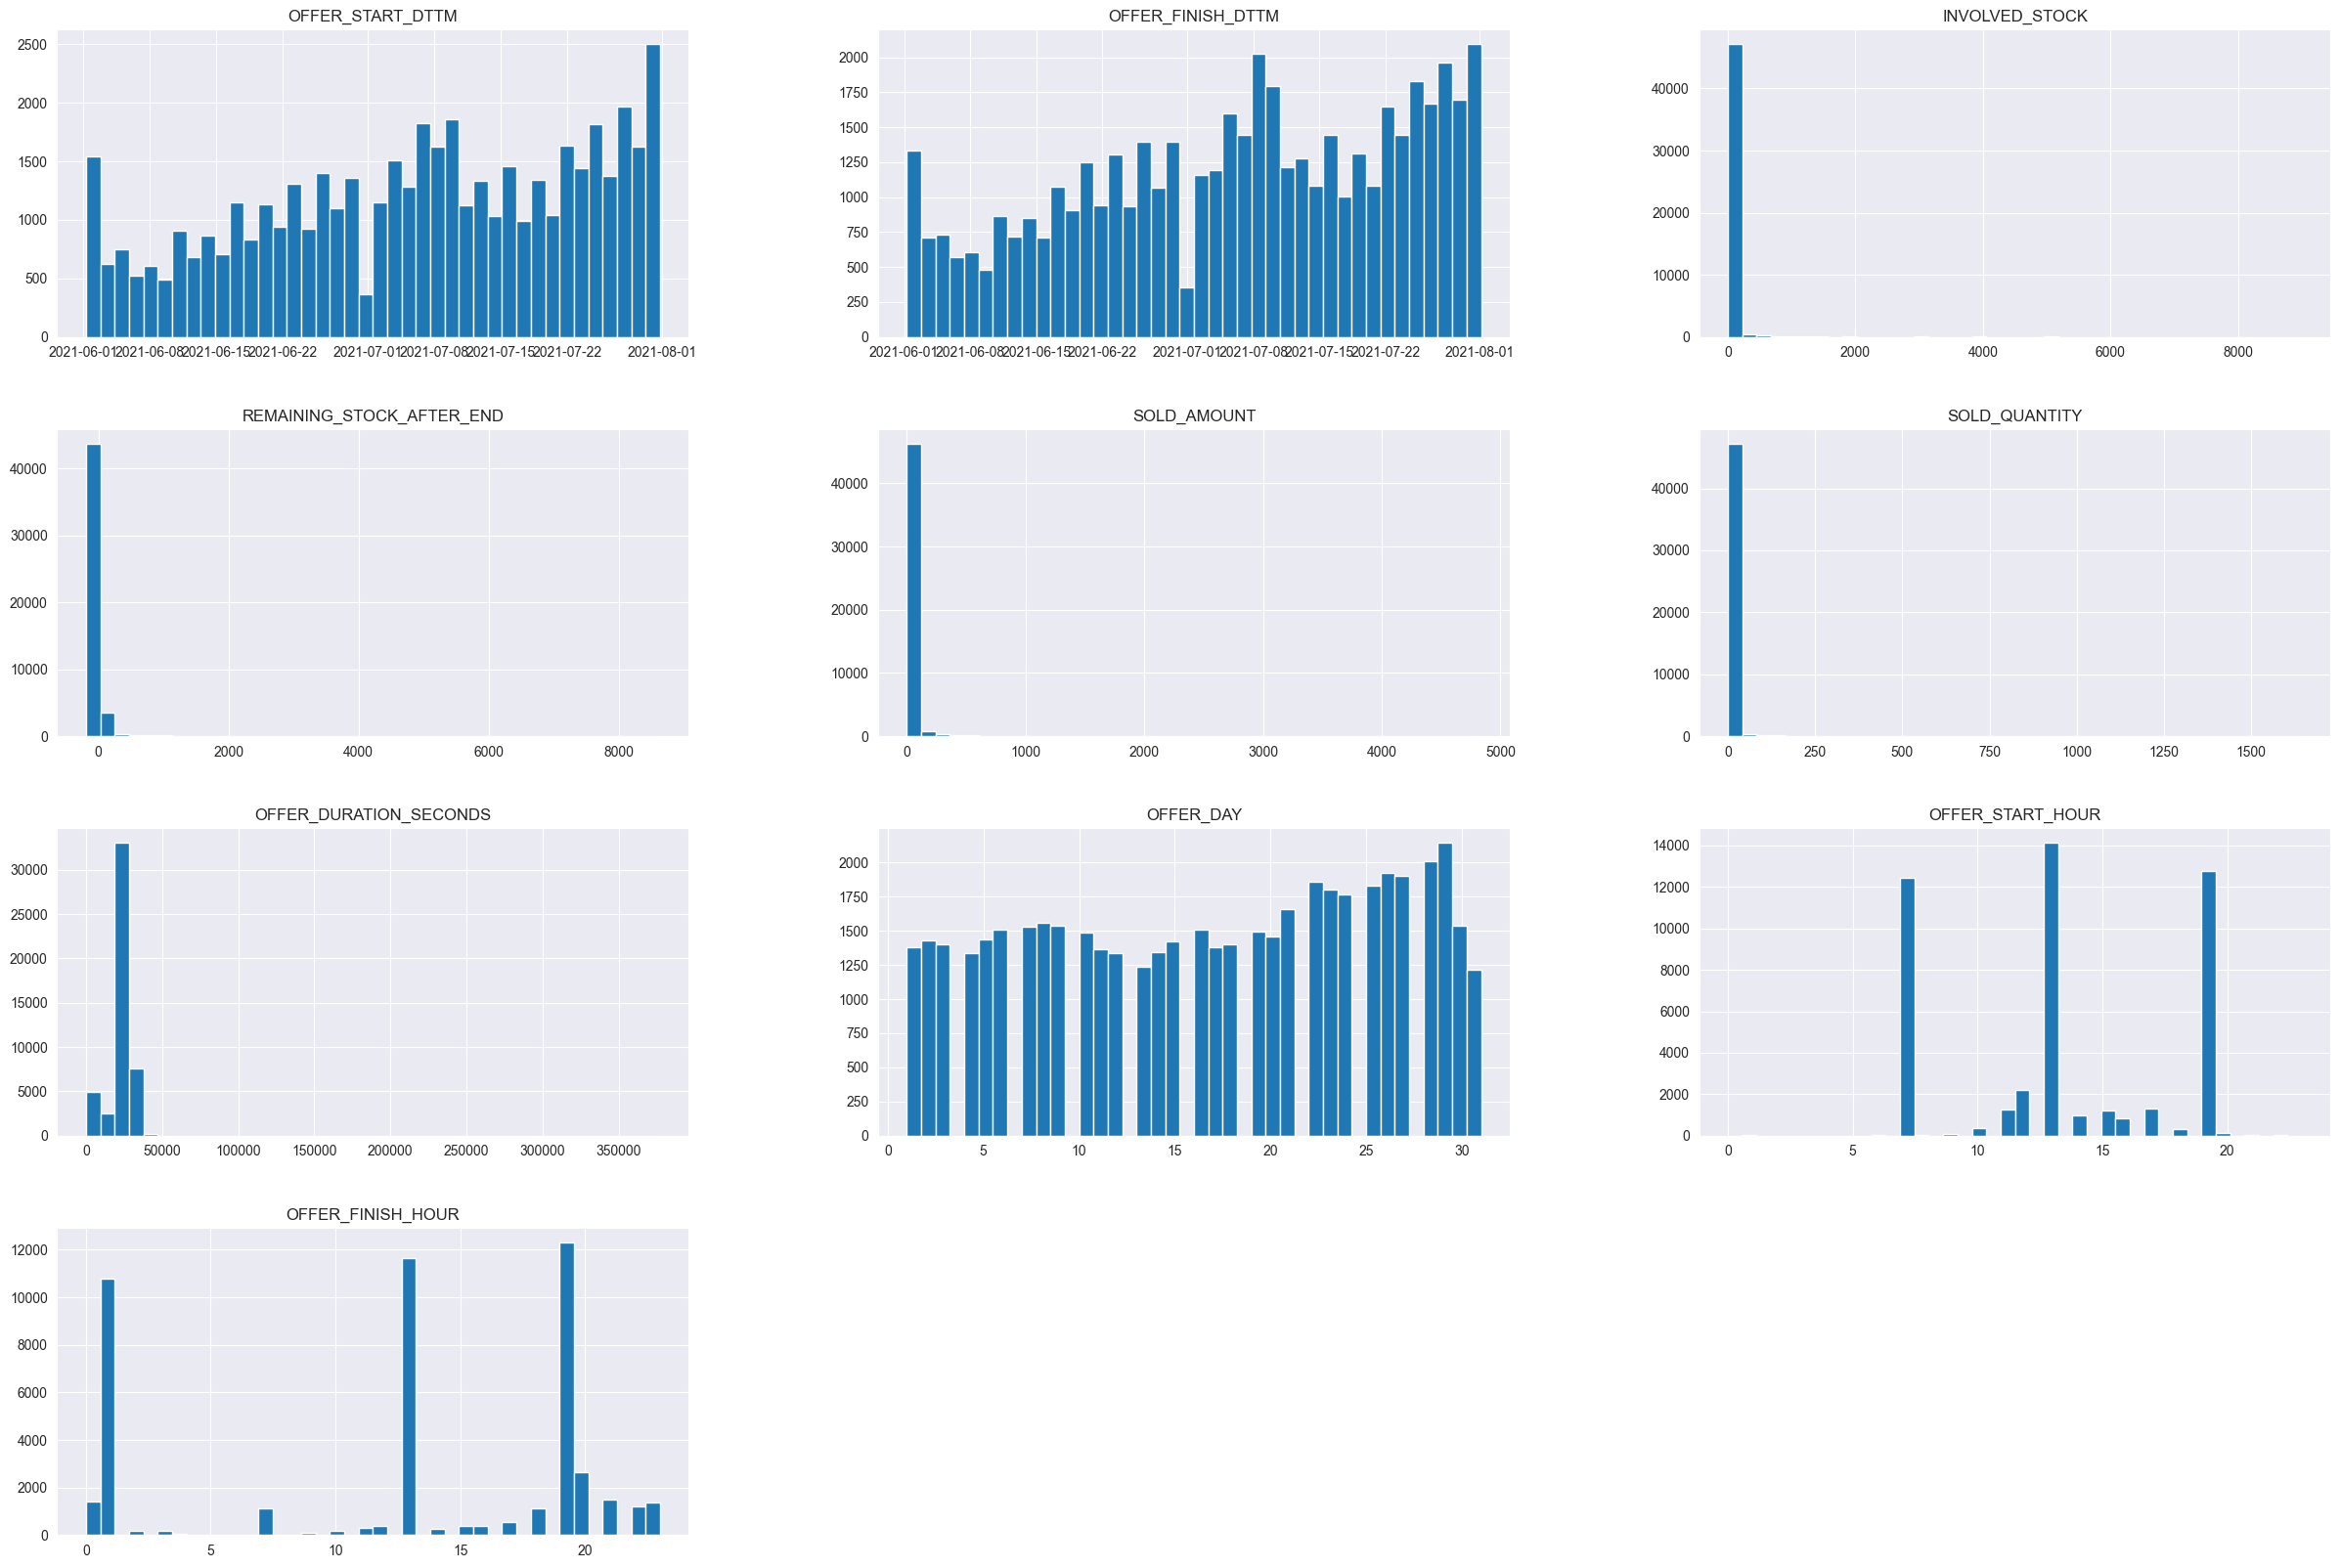

In [86]:
#estoque faltante
ax = df_ofertas.hist(bins=40, figsize=(30,20))
ax = ax

A quantidade de ofertas fica bem distribuida ao longo da primeira quinzena, depois disso tem um aumento, com seu pico no fim do mês.
Os horários de maior oferta são os mesmos que geram uma maior quantidade de produtos promocionais vendidos, a maior quantidade de ofertas pode estar relacionada a maior aderencia ou caso esse comportamento do cliente tenha sido identificado anteriormente, o start das ofertas foi adaptado para atender essa tendência.



## variavéis numéricas

In [87]:
#Análise de correlação da variavéis numericas, para definir a técnica de tratamento dos valores faltantes
cols = df_ofertas.columns
cols

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_DURATION',
       'OFFER_DURATION_SECONDS', 'OFFER_DAY', 'OFFER_START_HOUR',
       'OFFER_FINISH_HOUR', 'CONVERTED'],
      dtype='object')

C:\Users\barba\AppData\Local\Temp\ipykernel_28276\3019390485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_ofertas.corr()


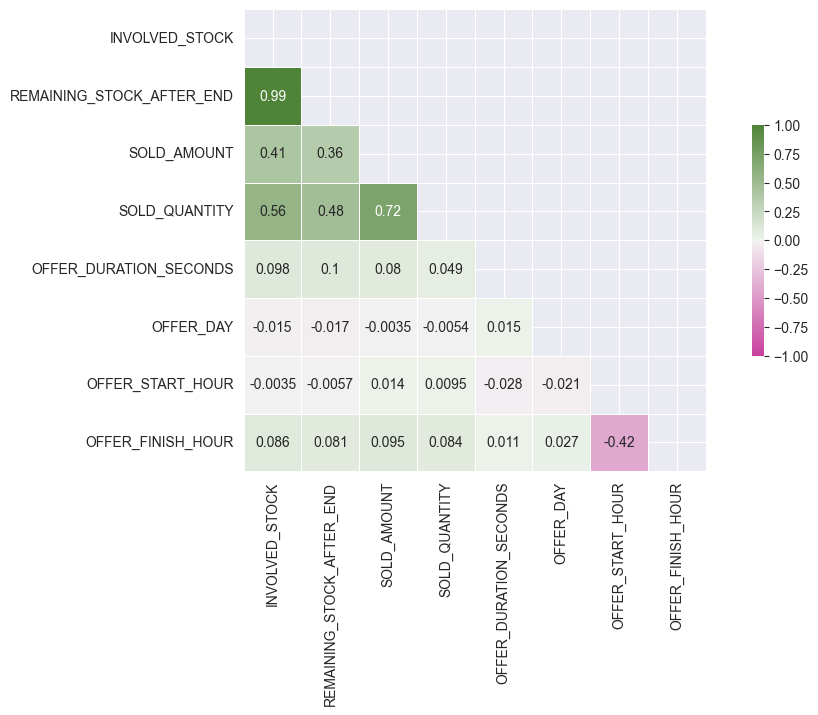

In [88]:
#Análise de correlação da variavéis numericas, para definir a técnica de tratamento dos valores faltantes
corr = df_ofertas.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 6))
cmap = sns.diverging_palette(330, 120, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Nas variavéis numericas, é possivél observar a afirmação das observações apontadas anteriormente, a relação forte de quantidade vendida e volume, além das informações de estoque.
Existem variáveis fortemente correlacionadas, mas com insights parecidos. Caso essas variavéis fossem utilizadas em um modelo preditivo de período com maior possibilidade de sucesso de vendas, por exemplo, é preciso selecionar as que melhor descreveriam o coportamento, neste caso, a quantidade de vendas por horário são importantes.
As de relação fraca podem ser mantidas, mas caso gerem ruído sem melhora na generalização,devem ser reavaliadas.
Portanto, das variavéis númericas, pode ser feita a dispensa ou combinação, dependendo da aplicação.


## Variavéis Categoricas

In [89]:
def plot_domain(col,title):
    #fig barras lateral rankeado
    fig = plt.gcf()
    fig.set_size_inches( 16, 10)

    #Categoria de produtos ordenado por qtd de venda
    sorted_df = df_ofertas.groupby('DOM_DOMAIN_AGG1')[col].sum().reset_index().sort_values(by=col, ascending=False)


    #plot
    ax = sns.barplot(y = sorted_df['DOM_DOMAIN_AGG1'], x=col, data=sorted_df, orient='h', estimator='sum')
    # for i, v in enumerate(sorted_df['SOLD_QUANTITY']):
    #     ax.text(v + 1, i + .15, str(v), color='black', fontweight='bold', fontsize=10)
    ax.set_title(title)
    plt.savefig(title +".png", dpi=100)


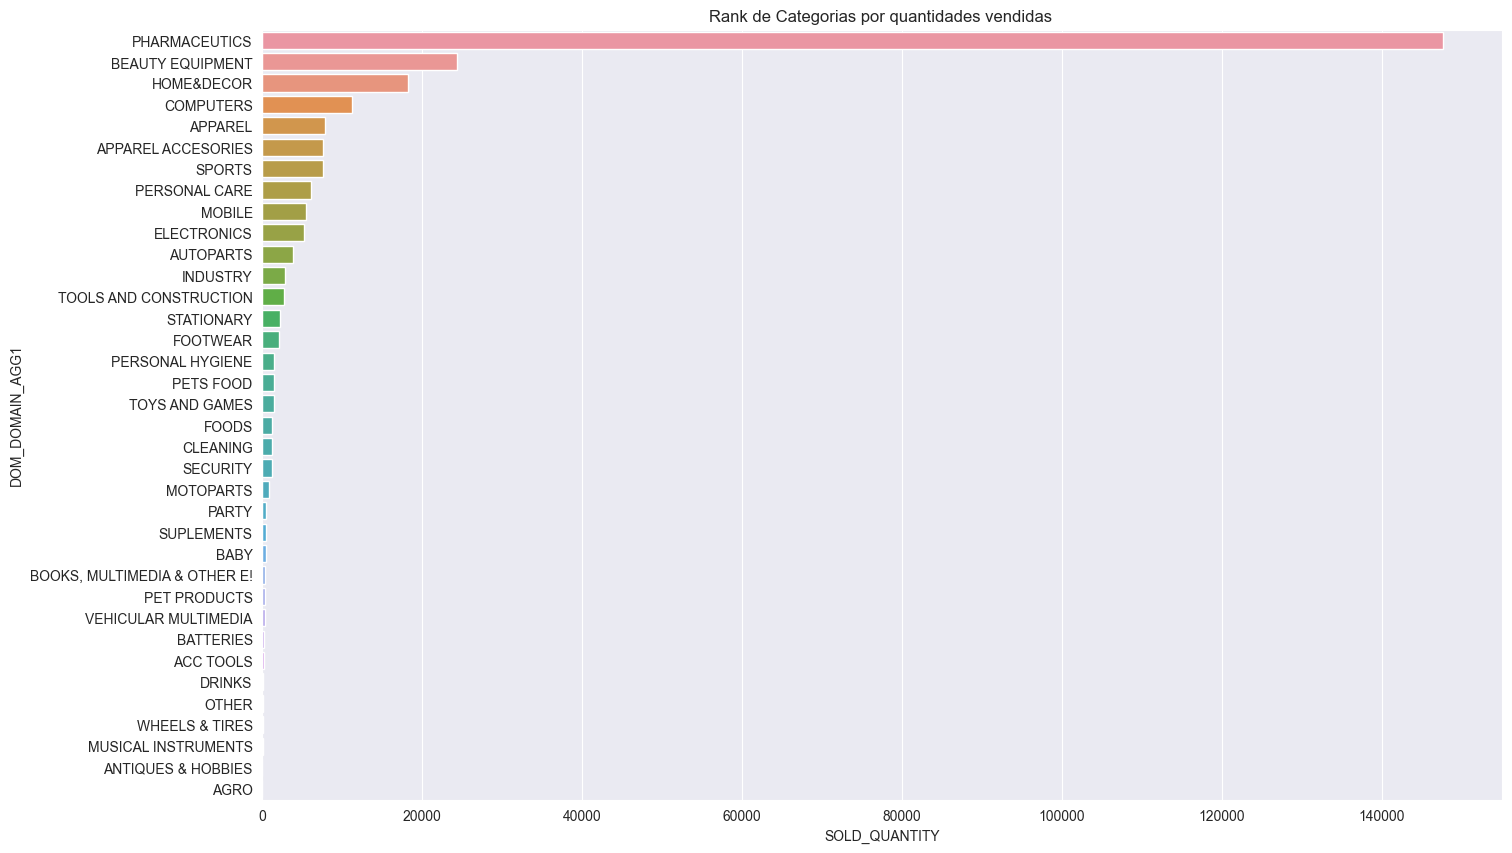

In [90]:
plot_domain('SOLD_QUANTITY', 'Rank de Categorias por quantidades vendidas ')


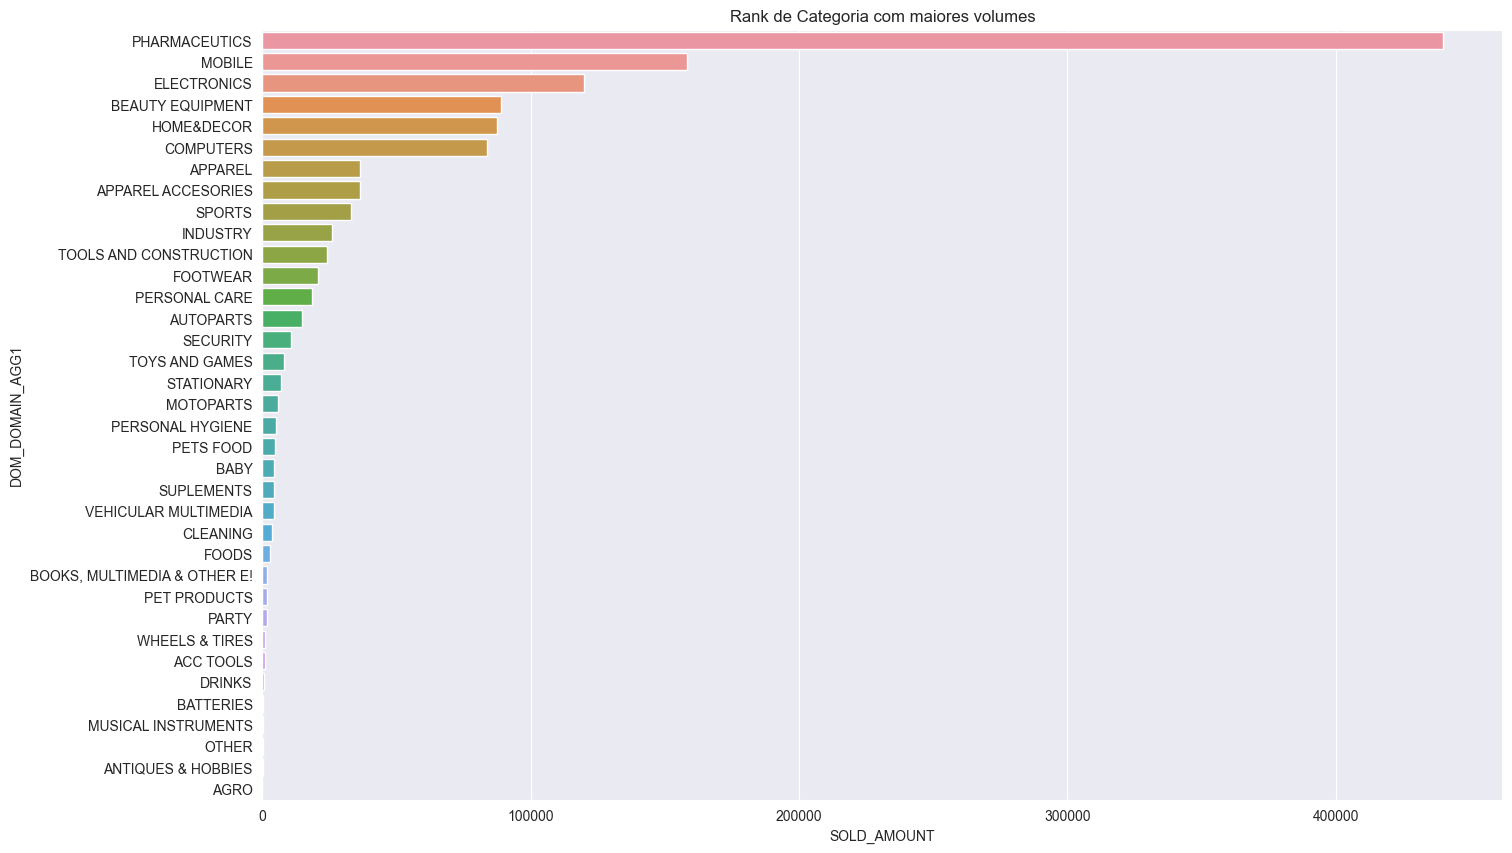

In [91]:
plot_domain('SOLD_AMOUNT', "Rank de Categoria com maiores volumes")

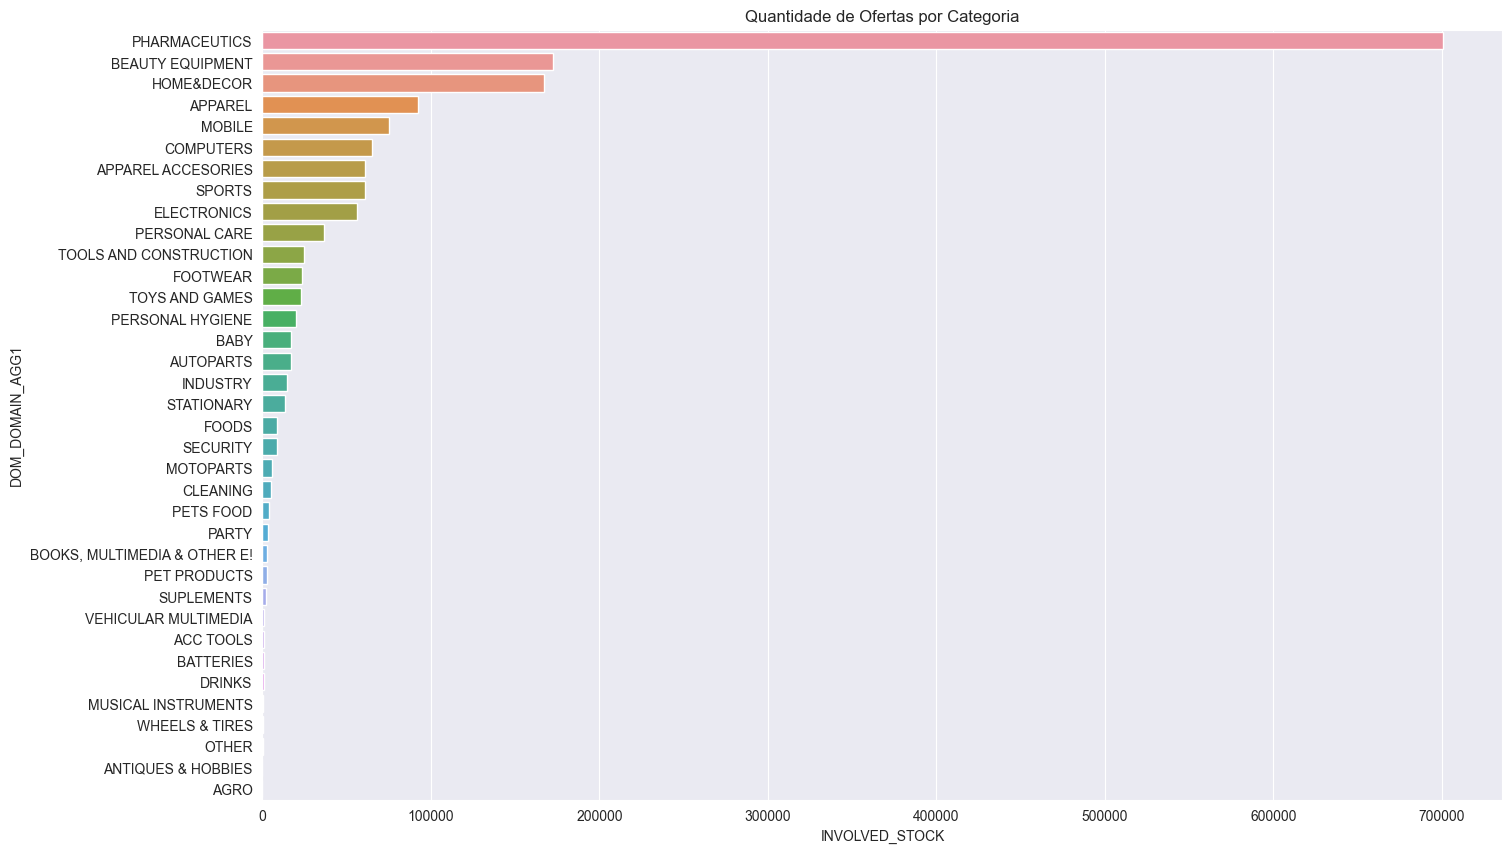

In [92]:
plot_domain('INVOLVED_STOCK', "Quantidade de Ofertas por Categoria")

O setor Farmaceutico é o com mais ofertas, maior conversão e maior geração de volume.
Poderia ser feita uma análise com mais detalhes dessa categoria, com tipo de produtos farmaceuticos, por exemplo, com dados de consumido dessa faixa, para entender se existe padrão (Idade, localização, sexo, etc), e assim, montar uma estratégia com promoções que possam atrair esse público. O mesmo pode ser feito para as outras duas categorias com maior conversão.


In [93]:
# média de qtd vendida e volume por DOM_DOMAIN_AGG1
sold_qtd_class = df_ofertas.groupby('DOM_DOMAIN_AGG1')['SOLD_QUANTITY'].mean().sort_values(ascending=False)
sold_amount_class = df_ofertas.groupby('DOM_DOMAIN_AGG1')['SOLD_AMOUNT'].mean().sort_values(ascending=False)
print("Quandtidade média vendida: ", round(sold_qtd_class,0))
print("\nVolume médio: ", round(sold_amount_class,0))

Quandtidade média vendida:  DOM_DOMAIN_AGG1
PHARMACEUTICS                   49.0
BEAUTY EQUIPMENT                22.0
SECURITY                         4.0
CLEANING                         3.0
COMPUTERS                        3.0
MOBILE                           3.0
PETS FOOD                        3.0
VEHICULAR MULTIMEDIA             3.0
HOME&DECOR                       3.0
INDUSTRY                         2.0
SPORTS                           2.0
AUTOPARTS                        2.0
SUPLEMENTS                       2.0
PERSONAL CARE                    2.0
APPAREL                          2.0
ANTIQUES & HOBBIES               2.0
OTHER                            2.0
TOOLS AND CONSTRUCTION           2.0
DRINKS                           2.0
PERSONAL HYGIENE                 2.0
ELECTRONICS                      2.0
ACC TOOLS                        2.0
BATTERIES                        2.0
APPAREL ACCESORIES               2.0
STATIONARY                       2.0
FOODS                          

### Teste de Hipotese
H0 - Var categóricas não influênciam na geração de negócio - compra e não compra
HA - Var categóricas influênciam na geração de negócio - compra e não compra

In [94]:
cols

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_DURATION',
       'OFFER_DURATION_SECONDS', 'OFFER_DAY', 'OFFER_START_HOUR',
       'OFFER_FINISH_HOUR', 'CONVERTED'],
      dtype='object')

In [95]:
df_ofertas['CONVERTED']

0         TRUE
1        FALSE
2         TRUE
3         TRUE
4         TRUE
         ...  
48741     TRUE
48742    FALSE
48743     TRUE
48744     TRUE
48745    FALSE
Name: CONVERTED, Length: 48158, dtype: object

In [96]:
from scipy.stats import chi2_contingency
def corr_categorical_varible(target):
    # Identifica as colunas categóricas
    colunas_categoricas = [col for col in df_ofertas.columns if df_ofertas[col].dtype == 'object']
    alpha = 0.05
    # Realiza o teste qui-quadrado para cada coluna categórica
    for col in colunas_categoricas:
        tabela_contingencia = pd.crosstab(df_ofertas[target],df_ofertas[col])
        chi, p, dof, expected = chi2_contingency(tabela_contingencia)
        print('\nColuna: {}'.format(col))
        print('Valor Qui-Quadrado: {:.2f}'.format(chi))
        print('Valor-p: {}'.format(p))
        print('Graus de Liberdade: {}'.format(dof))
        if p <= alpha:
            print('Dependente (Rejeita H0)')
        else:
            print('Independente (Aceita H0)')
corr_categorical_varible('CONVERTED')


Coluna: OFFER_START_DATE
Valor Qui-Quadrado: 152.36
Valor-p: 2.5601806143018837e-18
Graus de Liberdade: 30
Dependente (Rejeita H0)

Coluna: OFFER_TYPE
Valor Qui-Quadrado: 0.00
Valor-p: 1.0
Graus de Liberdade: 0
Independente (Aceita H0)

Coluna: ORIGIN
Valor Qui-Quadrado: 85.11
Valor-p: 2.815989756550583e-20
Graus de Liberdade: 1
Dependente (Rejeita H0)

Coluna: SHIPPING_PAYMENT_TYPE
Valor Qui-Quadrado: 879.97
Valor-p: 2.221034909807713e-193
Graus de Liberdade: 1
Dependente (Rejeita H0)

Coluna: DOM_DOMAIN_AGG1
Valor Qui-Quadrado: 1505.22
Valor-p: 4.854390955649729e-294
Graus de Liberdade: 35
Dependente (Rejeita H0)

Coluna: VERTICAL
Valor Qui-Quadrado: 974.39
Valor-p: 5.0311347107833584e-205
Graus de Liberdade: 8
Dependente (Rejeita H0)

Coluna: DOMAIN_ID
Valor Qui-Quadrado: 5922.26
Valor-p: 0.0
Graus de Liberdade: 1265
Dependente (Rejeita H0)

Coluna: CONVERTED
Valor Qui-Quadrado: 48154.00
Valor-p: 0.0
Graus de Liberdade: 1
Dependente (Rejeita H0)


In [97]:
corr_categorical_varible('DOMAIN_ID')


Coluna: OFFER_START_DATE
Valor Qui-Quadrado: 58402.76
Valor-p: 0.0
Graus de Liberdade: 37950
Dependente (Rejeita H0)

Coluna: OFFER_TYPE
Valor Qui-Quadrado: 0.00
Valor-p: 1.0
Graus de Liberdade: 0
Independente (Aceita H0)

Coluna: ORIGIN
Valor Qui-Quadrado: 22517.39
Valor-p: 0.0
Graus de Liberdade: 1265
Dependente (Rejeita H0)

Coluna: SHIPPING_PAYMENT_TYPE
Valor Qui-Quadrado: 15639.40
Valor-p: 0.0
Graus de Liberdade: 1265
Dependente (Rejeita H0)

Coluna: DOM_DOMAIN_AGG1
Valor Qui-Quadrado: 1685530.00
Valor-p: 0.0
Graus de Liberdade: 44275
Dependente (Rejeita H0)

Coluna: VERTICAL
Valor Qui-Quadrado: 385264.00
Valor-p: 0.0
Graus de Liberdade: 10120
Dependente (Rejeita H0)

Coluna: DOMAIN_ID
Valor Qui-Quadrado: 60919870.00
Valor-p: 0.0
Graus de Liberdade: 1600225
Dependente (Rejeita H0)

Coluna: CONVERTED
Valor Qui-Quadrado: 5922.26
Valor-p: 0.0
Graus de Liberdade: 1265
Dependente (Rejeita H0)


In [98]:
df_ofertas_vertical = df_ofertas.groupby(['VERTICAL','CONVERTED'])['SOLD_AMOUNT'].value_counts()
df_ofertas_vertical

VERTICAL  CONVERTED  SOLD_AMOUNT
ACC       FALSE      0.00           1267
          TRUE       4.09              5
                     0.84              4
                     2.22              4
                     2.80              4
                                    ... 
T & B     TRUE       154.49            1
                     179.39            1
                     234.44            1
                     346.74            1
                     347.13            1
Name: SOLD_AMOUNT, Length: 15371, dtype: int64

Com o limiar de 0.05 para alpha e avaliado o p-value, não é aceita a hipotese de que as caracteristicas analisadas não influênciam na decisão de compra ou não compra do produto promocinal.

<Axes: xlabel='OFFER_DAY', ylabel='REMAINING_STOCK_AFTER_END'>

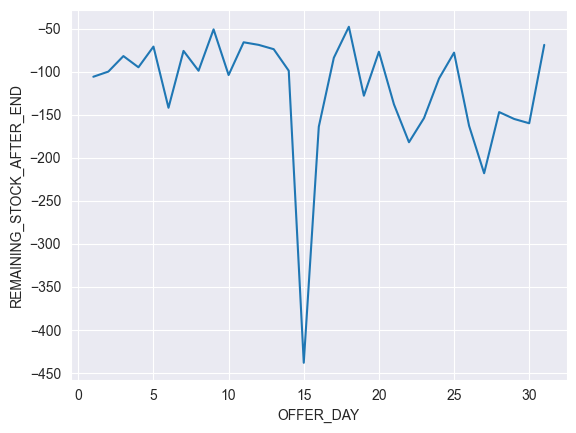

In [99]:
df_ofertas_estoque_neg = df_ofertas[df_ofertas['REMAINING_STOCK_AFTER_END'] < 0]
sns.lineplot(df_ofertas_estoque_neg.groupby('OFFER_DAY')['REMAINING_STOCK_AFTER_END'].sum())

<Axes: xlabel='OFFER_DAY', ylabel='REMAINING_STOCK_AFTER_END'>

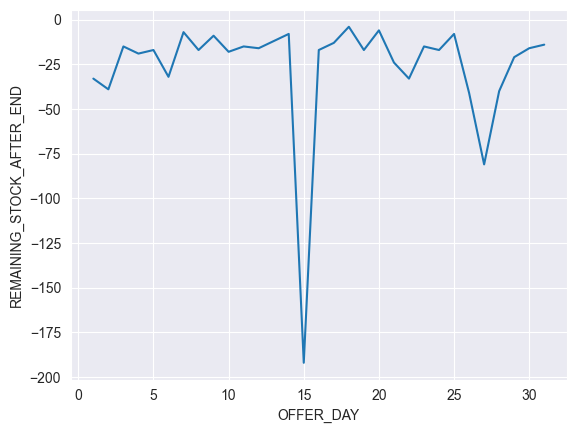

In [100]:
sns.lineplot(df_ofertas_estoque_neg.groupby('OFFER_DAY')['REMAINING_STOCK_AFTER_END'].min())


In [101]:
df_ofertas_estoque_neg.groupby('OFFER_DAY').min()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION,OFFER_DURATION_SECONDS,OFFER_START_HOUR,OFFER_FINISH_HOUR,CONVERTED
OFFER_DAY,,,,,,,,,,,,,,,,,,
1,2021-01-01,2021-06-01 07:00:00+00:00,2021-06-01 10:15:51+00:00,lightning_deal,5,-33,5.27,4.0,OTHER,OTHER,AUTOPARTS,ACC,MLM-BAR_CODE_SCANNERS,0 days 00:23:53,1433,7,0,TRUE
2,2021-01-02,2021-06-02 07:00:00+00:00,2021-06-02 11:25:01+00:00,lightning_deal,5,-39,6.51,4.0,A,OTHER,APPAREL,APP & SPORTS,MLM-AEROBICS_AND_FITNESS_EQUIPMENT,0 days 00:55:22,3322,7,0,TRUE
3,2021-01-03,2021-06-03 07:00:00+00:00,2021-06-03 09:20:16+00:00,lightning_deal,4,-15,5.82,1.0,A,OTHER,APPAREL ACCESORIES,ACC,MLM-BALLOONS,0 days 00:40:25,2425,7,0,TRUE
4,2021-01-04,2021-06-04 07:00:00+00:00,2021-06-04 10:10:28+00:00,lightning_deal,5,-19,5.75,4.0,A,OTHER,APPAREL ACCESORIES,ACC,MLM-AUTOMOTIVE_LED_LIGHT_BARS,0 days 00:15:36,936,7,0,TRUE
5,2021-01-05,2021-06-05 07:00:00+00:00,2021-06-05 09:15:29+00:00,lightning_deal,5,-17,3.96,3.0,A,OTHER,APPAREL,ACC,MLM-ADHESIVE_TAPES,0 days 00:18:42,1122,7,0,TRUE
6,2021-01-06,2021-06-06 07:00:00+00:00,2021-06-06 08:35:12+00:00,lightning_deal,3,-32,3.80,4.0,A,OTHER,APPAREL,ACC,MLM-AUTOMOTIVE_LED_LIGHT_BARS,0 days 00:51:25,3085,7,0,TRUE
7,2021-01-07,2021-06-07 07:00:00+00:00,2021-06-07 12:35:22+00:00,lightning_deal,2,-7,2.99,1.0,A,OTHER,APPAREL ACCESORIES,APP & SPORTS,MLM-ADHESIVE_TAPES,0 days 00:10:39,639,7,0,TRUE
8,2021-01-08,2021-06-08 07:00:00+00:00,2021-06-08 09:40:11+00:00,lightning_deal,5,-17,3.61,3.0,A,OTHER,APPAREL,ACC,MLM-ANTIBACTERIAL_GELS,0 days 00:20:23,1223,7,0,TRUE
9,2021-01-09,2021-06-09 07:00:00+00:00,2021-06-09 12:20:32+00:00,lightning_deal,5,-9,5.35,6.0,A,OTHER,APPAREL ACCESORIES,ACC,MLM-BODY_SHAPERS,0 days 00:26:56,1616,7,0,TRUE


outliers

Quanto ao estoque restante no fim do dia, ocorre com certa frequência a venda de quantidade a mais do que as disponivéis. Isso pode de fato ser um comportamento de outliers ou a base se encontra com inputs errados, vito que a coluna de quantidade vendida não considera esses valores negativos de estoque.
Para produtos onde a aderencia das promoções são altas, talvez seja válido trabalhar com fila empurrada, ou seja, manter o estoque com base em previsão.
Nos demais itens, manter o sistema de fila puxada, para não gerar impacto negativo com o cliente, caso a compra seja cancelada ou entregue com atraso e não gerar estoque em excesso.

# Insights extraídos e próximos passos

1. Dados: Os dados faltantes, podem ser subistituidos? Existe outlier(qtd de produtos, dia, horário, etc)?
    Feito no item inicial:
    - Higienização dos dados ajustando os tipos de dados.
    - Criação de novas feautures com auxílio da data inicial da promoção.
    - Tratamento de valores faltantes.

2. Produtos: Quais foram os produtos que mais venderam?
    Top3: Farmaceutico, Itens de Beleza, Decoração para casa.

3. Vendas durante a oferta: Existe dia e horário de pico e vale para as ofertas e para as quantidades vendidas?
    Sim.
    - horários: almoço (12:00 e 13:00), fim do dia (19:00).
    - Dias: segunda quinzena do mês com pico de conversão nos últimos dias do mês.

4. Vendas durante a oferta:Existe correlação entre quantidade vendida vs Horário e dia da oferta?
    Sim, existem horários onde as ofertas têm maior e menor conversão.
        De maior conversão já foi mencionado, de monor conversão é do período a partir das 20:00 até o inicio da manhã e período da tarde, depois do pico às 13:00.

5. Existe sazonalidade e tendência?
    Sim, tanto quanto as ofertas quando a conversão dessas ofertas.
    Sazonalidade quinzenal e diária, com comportamento cíclico. A tendência se mostra crescente na visão diária, mas seria necessária uma maior quantidade de dados, outros meses, para averiguar se essa tendência na verdade é só um comportamento cíclico.

5. A duração da oferta influência na quantidade vendida?
   De acordo com a correlação de Pearson e a distribuição do tempo de duração, não. (Pode ser retirada do dataset).
6. Envio:O tipo de pagamento do envio tem impacto na quantidade vendida?
    Fazendo a avaliação de Hipotese para cada variavél categorica, com H0 afirmando a independência das variavéis com o resultado final (compra e não compra), conclui que não é possivél descartar essas variavéis em uma modelagem, esse fator pode sim infunenciar na decisão final do cliente, para confirmar isso, pode ser feita uma avaliação mais apurada de feaure importance.
7. É possivél fazer o descarte ou junção de alguma variavél?
    Sim.
        Descarte: ORIGIN e VERTICAL e duração da promoção.
        Junção: DOMAIN_ID - DOM_DOMAIN_AGG1.

8. Como melhorar?
    Operacional - Estoque:
        - Produtos vendidos sem estoque, é válido avaliar se é puxado, empurrado ou ambos.
        - Ofertas com envio grátis para as que não tiveram tanta aderência e não tinham esse envio, para futura avaliação do comportamento.

    Estratégico - Aumentar aderencia de promoções com pouca conversão.
        Explorar os produtos do setor de farmácia, equipamentos de beleza, e outras categorias que possam ter associação, para que assim, junto com a avaliação de informações do público consumido dessas promoções, a listagem de possivéis promoções dos outros grupos que podem atrair esse público.
        Estratégico - Aumentar aderencia de promoções com pouca conversão.

